In [10]:
import pandas as pd
import seaborn as sns
import numpy as np
from matplotlib import pyplot as plt

In [2]:
df = pd.read_csv('result.csv', index_col = 0)

In [3]:
df.head

<bound method NDFrame.head of               name  height  weight  generation  \
id                                               
1        bulbasaur       7      69           1   
2          ivysaur      10     130           1   
3         venusaur      20    1000           1   
4       charmander       6      85           1   
5       charmeleon      11     190           1   
...            ...     ...     ...         ...   
1021   raging-bolt      52    4800           9   
1022  iron-boulder      15    1625           9   
1023    iron-crown      16    1560           9   
1024     terapagos       2      65           9   
1025     pecharunt       3       3           9   

                                                  moves             forms  \
id                                                                          
1     ['razor-wind', 'swords-dance', 'cut', 'bind', ...     ['bulbasaur']   
2     ['swords-dance', 'cut', 'bind', 'vine-whip', '...       ['ivysaur']   
3     ['swo

In [5]:
#Scatterplot weight x height

<Axes: xlabel='weight', ylabel='height'>

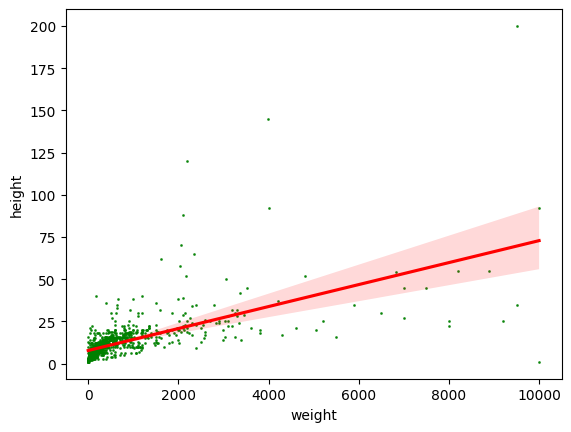

In [4]:
sns.regplot(data=df, x='weight', y='height',
           marker='o', color='g', scatter_kws={'s':1},
           line_kws=dict(color='r'))

In [7]:
#Heatmap - dual pokemon types

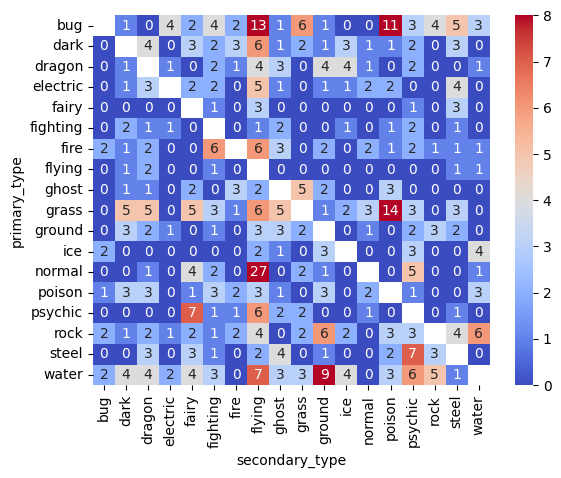

In [5]:
types_df = df.copy()

cross_tab = pd.crosstab(df['primary_type'], df['secondary_type'])

uniform_data = np.random.rand(18, 18)
diag_mask = np.eye(*uniform_data.shape, dtype=bool)

ax = sns.heatmap(cross_tab, annot=True, cmap='coolwarm', fmt='d', vmin=0, vmax=8, mask=diag_mask)

In [8]:
#Boxplot size by type

In [9]:
#Boxplot weight by type

In [10]:
#Number of moves per type

In [11]:
#Average stats per generation

In [12]:
#Type effectiveness heatmap

In [8]:
from typeEffectiveness import damage_array, pokemon_types

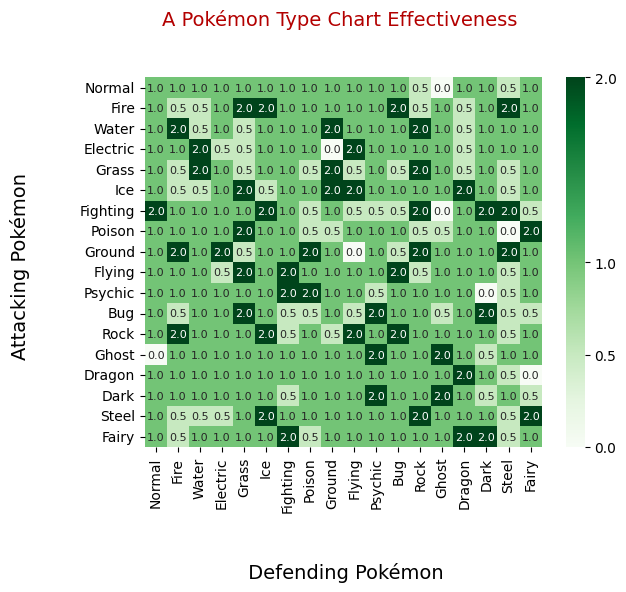

In [15]:
ax = sns.heatmap(damage_array, annot=damage_array, fmt='', cmap="Greens",
                 xticklabels=pokemon_types, yticklabels=pokemon_types, annot_kws={'size': 8})

cbar = ax.collections[0].colorbar
cbar.set_ticks([0, 0.5, 1, 2])
ax.set_xlabel("\n\n Defending Pokémon", size=14)
ax.set_ylabel("Attacking Pokémon \n\n", size=14)
plt.title("A Pokémon Type Chart Effectiveness \n\n", size=14, color="#b30000")
plt.show()

In [13]:
#Stats correlation heatmap

In [ ]:
#Amount of abilities

In [88]:
len_df = df.copy()
len_df['abilities'] = len_df['abilities'].apply(eval)
len_df['abilities_count'] = len_df.abilities.map(len)

[Text(0, 0, '141'), Text(0, 0, '354'), Text(0, 0, '530')]

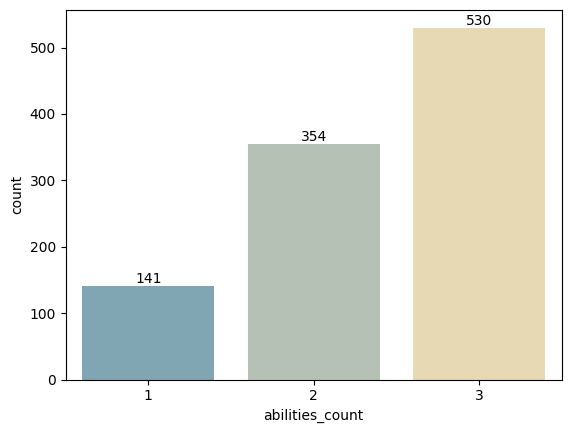

In [98]:
ax = sns.countplot(data=len_df, x='abilities_count', palette='blend:#7AB,#EDA')
ax.bar_label(ax.containers[0])